In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import yaml
import os

In [2]:
# change this directory to the one where the data is stored
data_dir = '/Users/jpga/Documents/reconstruction_scan'
# test file name
test_file_name = 'DYG14_1701987709.h5'

In [3]:
# save yaml file in Python
run_data = yaml.safe_load(open('simple-scan.yml'))

In [4]:
# yaml file is a list of dictionaries
run_data

[{'AWA:Bira3Ctrl:Ch10': -0.5,
  'AWA:Bira4Ctrl:Ch01': 0.0,
  'AWAVXI11ICT:Ch4': [6e-10,
   5e-10,
   5e-10,
   5e-10,
   5e-10,
   6e-10,
   5e-10,
   6e-10,
   5e-10,
   5e-10],
  'pi:QBCR1:Ch7:EnablePulse': 0,
  'save_filename': '/home/awa/awa_data/12-07_6DReconstruction/reconstruction_scan/DYG14_1701987488.h5'},
 {'AWA:Bira3Ctrl:Ch10': -0.45,
  'AWA:Bira4Ctrl:Ch01': 0.0,
  'AWAVXI11ICT:Ch4': [6e-10,
   5e-10,
   5e-10,
   6e-10,
   5e-10,
   5e-10,
   5e-10,
   5e-10,
   6e-10,
   6e-10],
  'pi:QBCR1:Ch7:EnablePulse': 0,
  'save_filename': '/home/awa/awa_data/12-07_6DReconstruction/reconstruction_scan/DYG14_1701987512.h5'},
 {'AWA:Bira3Ctrl:Ch10': -0.4,
  'AWA:Bira4Ctrl:Ch01': 0.0,
  'AWAVXI11ICT:Ch4': [5e-10,
   5e-10,
   6e-10,
   5e-10,
   5e-10,
   5e-10,
   5e-10,
   5e-10,
   6e-10,
   5e-10],
  'pi:QBCR1:Ch7:EnablePulse': 0,
  'save_filename': '/home/awa/awa_data/12-07_6DReconstruction/reconstruction_scan/DYG14_1701987530.h5'},
 {'AWA:Bira3Ctrl:Ch10': -0.35,
  'AWA:Bira4Ctrl:

In [5]:
# first element of yaml file correspond to dictionary for the first quad strength
run_data[0]

{'AWA:Bira3Ctrl:Ch10': -0.5,
 'AWA:Bira4Ctrl:Ch01': 0.0,
 'AWAVXI11ICT:Ch4': [6e-10,
  5e-10,
  5e-10,
  5e-10,
  5e-10,
  6e-10,
  5e-10,
  6e-10,
  5e-10,
  5e-10],
 'pi:QBCR1:Ch7:EnablePulse': 0,
 'save_filename': '/home/awa/awa_data/12-07_6DReconstruction/reconstruction_scan/DYG14_1701987488.h5'}

In [6]:
quad_pv_name = 'AWA:Bira3Ctrl:Ch10' # key for the quad strengths
run_data[0][quad_pv_name] # first quad strength

-0.5

In [7]:
test_file_name = run_data[0]['save_filename'][-19:] # h5 filename for the 1st quad strength
print(test_file_name)
# load the h5 file into Python:
test_file = h5py.File(os.path.join(data_dir, test_file_name), 'r')

DYG14_1701987488.h5


In [8]:
# shape of images array (n_imgs x pixels x pixels)
dim_imgs = test_file['images'].shape
print(dim_imgs)

(10, 700, 700)


In [9]:
# Initialize array to save organized data:

# array with the quad strengths
ks = np.zeros_like(run_data)
print(ks.shape)
# array with the images
imgs = np.zeros((len(run_data), *dim_imgs)) #np.zeros((21,10,700,700))
print(imgs.shape)

(21,)
(21, 10, 700, 700)


In [10]:
# iterate over quad strengths:
for i in range(len(run_data)):
    # save quad strength
    ks[i] = run_data[i][quad_pv_name]
    # load images
    file_name = run_data[i]['save_filename'][-19:]
    file = h5py.File(os.path.join(data_dir, file_name), 'r')
    # save image data into array:
    imgs[i] = test_file['images'][:]

In [11]:
# show ks
ks

array([-0.5, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05,
       0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
      dtype=object)

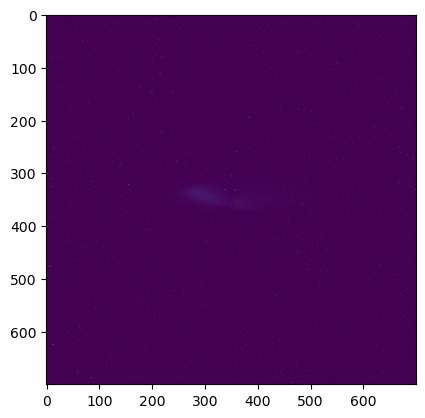

In [12]:
# plot first image of the first quad strength
plt.imshow(imgs[0][0])

In [13]:
def transform(ks):
    """"
    Transform the quad strength PV values into 
    physical units

    Parameters:
    -----------
    ks: np.array
        Array with the quad strength PV values

    Returns:
    --------
    np.array
        Array with the quad strength values in T/m
    """
    p0c = 43.3e6
    C_LIGHT = 299792458
    gradient = ks*100*1.32e-2/1.29*1.04
    beam_rigidity = p0c / C_LIGHT
    return gradient / beam_rigidity

In [14]:
# to print docstring:
print(transform.__doc__)

"
    Transform the quad strength PV values into 
    physical units

    Parameters:
    -----------
    ks: np.array
        Array with the quad strength PV values

    Returns:
    --------
    np.array
        Array with the quad strength values in T/m
    


In [15]:
ks_physical_units = transform(ks)
ks_physical_units

array([-3.6840063585799454, -3.3156057227219504, -2.9472050868639563,
       -2.578804451005962, -2.2104038151479672, -1.8420031792899727,
       -1.4736025434319782, -1.1052019075739836, -0.7368012717159891,
       -0.36840063585799454, 0.0, 0.36840063585799454, 0.7368012717159891,
       1.1052019075739836, 1.4736025434319782, 1.8420031792899727,
       2.2104038151479672, 2.578804451005962, 2.9472050868639563,
       3.3156057227219504, 3.6840063585799454], dtype=object)

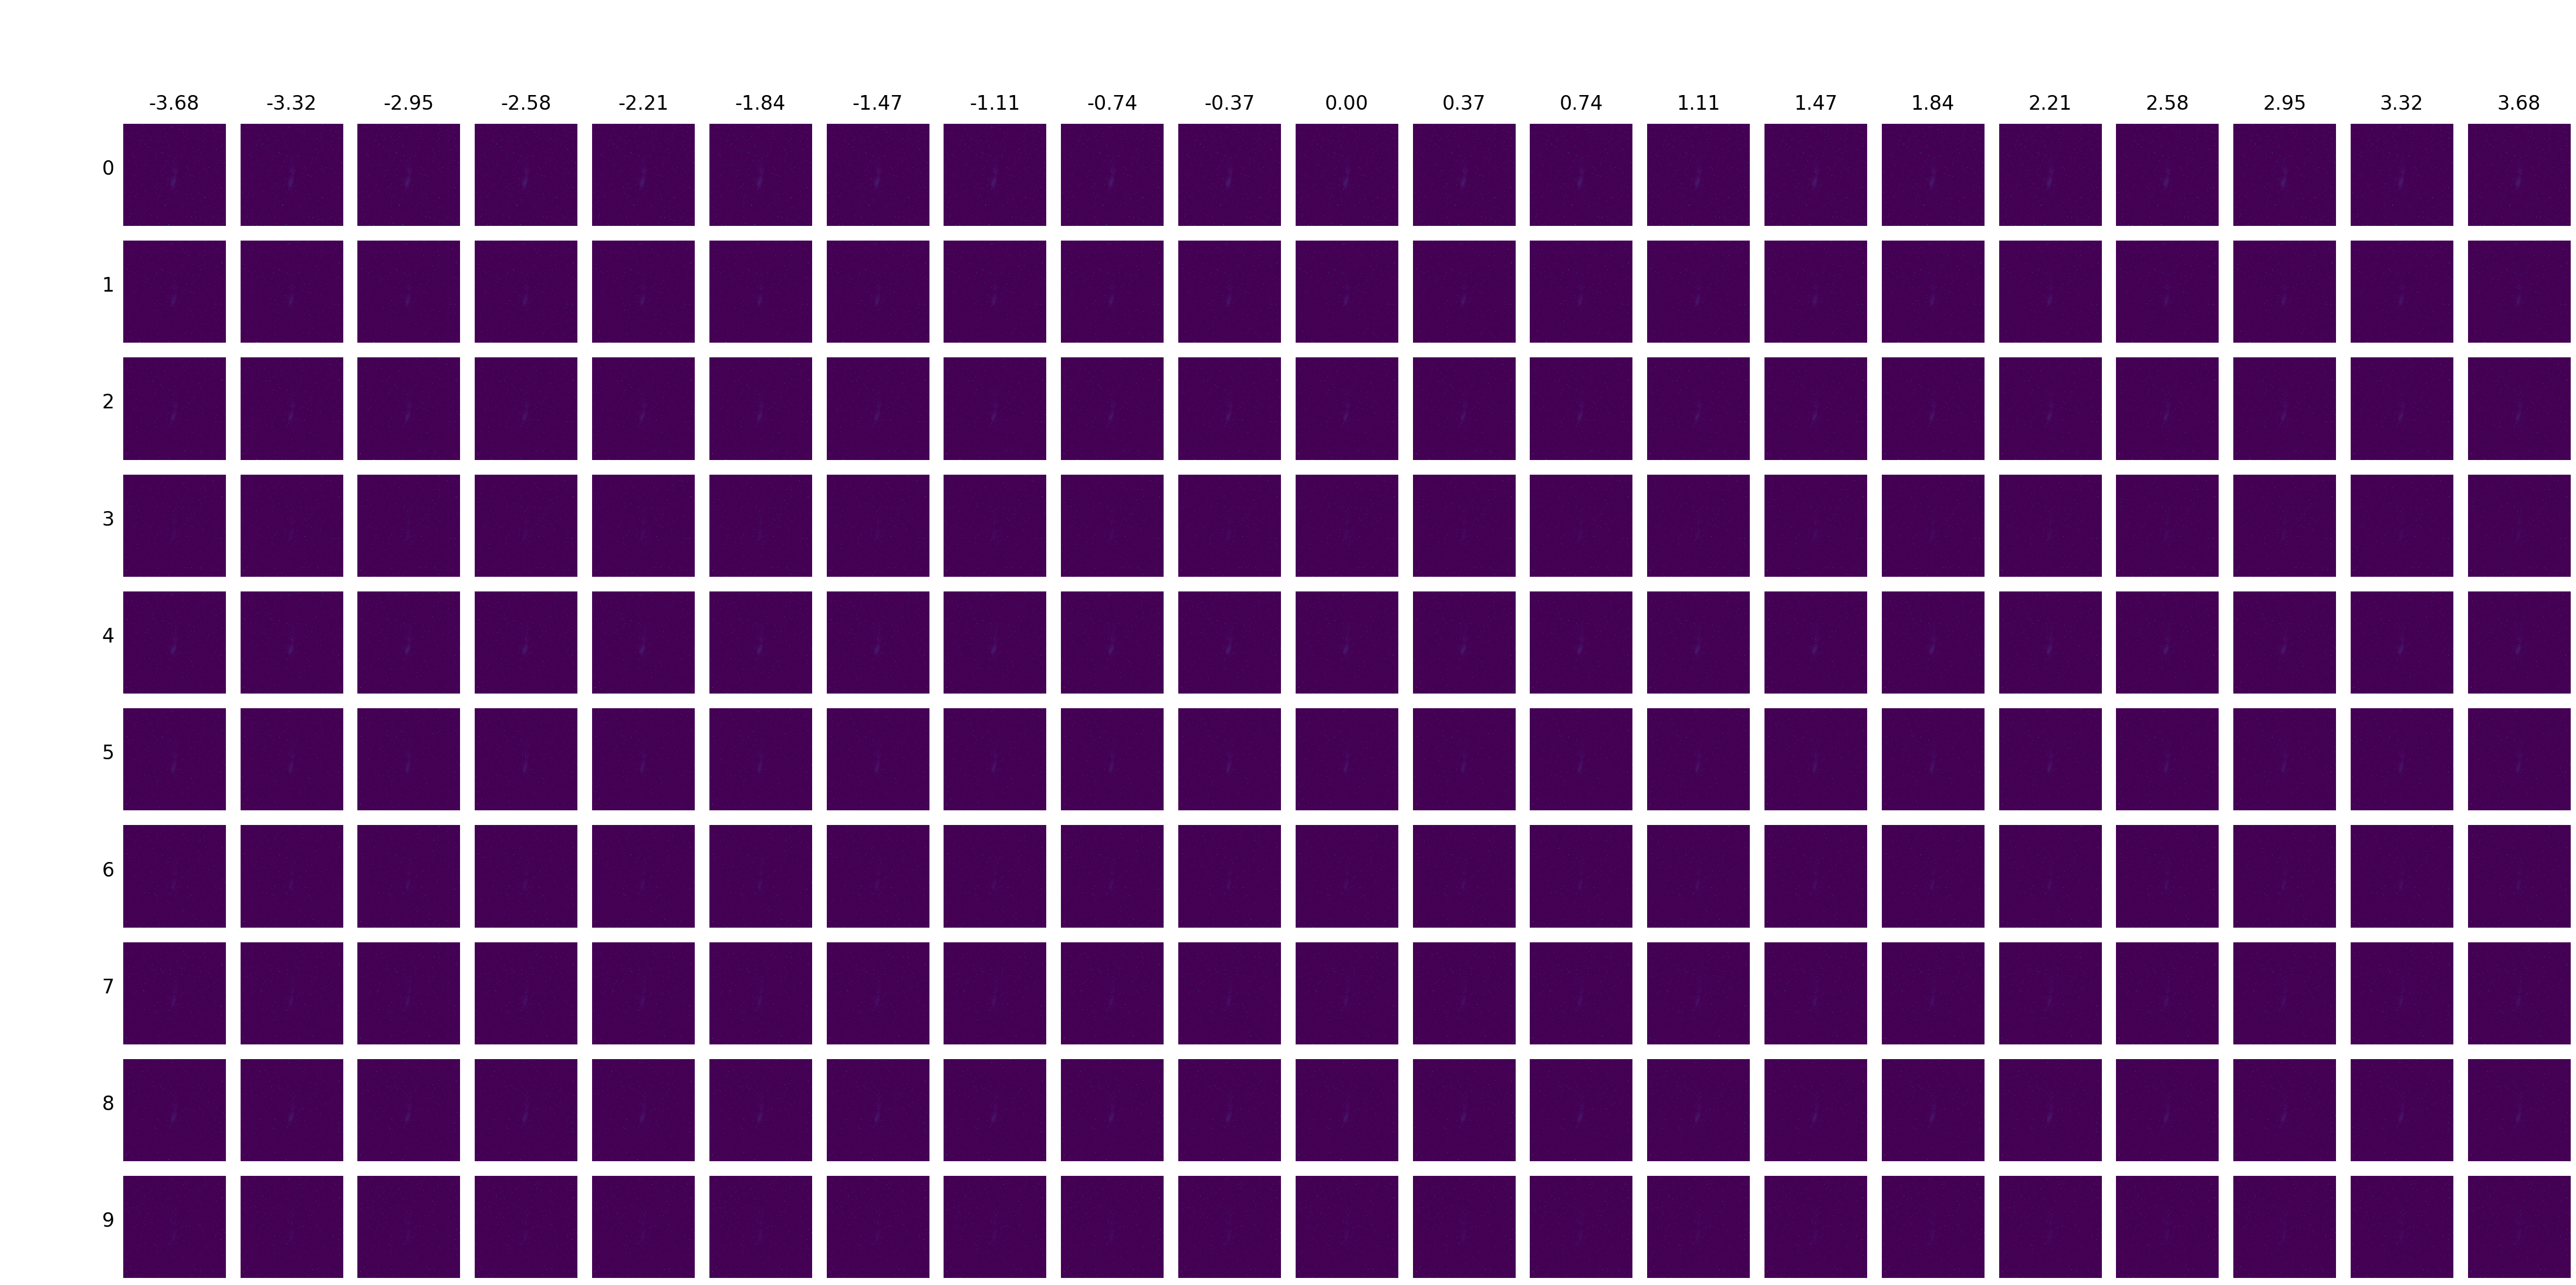

In [16]:
# plot raw images:
fig, ax = plt.subplots(imgs.shape[1]+1, imgs.shape[0]+1, figsize=((imgs.shape[0]+1)*2, (imgs.shape[1]+1)*2))
ax[0,0].set_axis_off()
for k in range(imgs.shape[0]):
    ax[0,k+1].set_axis_off()
    ax[0,k+1].text(
        0.5, 0, 
        f'{ks_physical_units[k]:.2f}', 
        fontsize=24, 
        ha='center'
    )
    for i in range(imgs.shape[1]):
        ax[i+1,k+1].imshow(
            imgs[k,i].T,
            interpolation='none',
            origin='lower'
        )
        ax[i+1,k+1].set_axis_off()
for i in range(imgs.shape[1]):
    ax[i+1,0].text(1, 0.5, f'{i}', fontsize=24, ha='center')
    ax[i+1,0].set_axis_off()
fig.tight_layout()
plt.show()

# Homework

We have succesfully saved and plotted the raw data. Now, we will work in the post-processing. I will include an example for a single image post-processing. Then, you should run a double for loop to apply the post-processing to every image in the dataset and save it as a single array named `pp_images`

We will follow these steps to process the images:

1. Mirror the images in the $x$ axis using `np.flip`. Remember that the $x$ axis is the first coordinate (zeroth dimension) of the 2D image array.

2. Apply triangle thresholding using the `skimage.filters.threshold_triangle` package and `np.clip`. This will threshold the image to eliminate dark noise. For more info, look up the documentation.

3. Apply median filter using `scipy.ndimage.median_filter`. This will remove the salt and pepper noise. For more info, look up the documentation.

4. Normalize the images such that the sum of a single image is 1. 

**Note: to install `skimage`, open the terminal (or anaconda console in Windows), activate the project environment and type `conda install scikit-image`**

Finally, you should plot all of the post-processed images. You can use the same plotting code as the one above.

In [17]:
from skimage import filters
from scipy.ndimage import median_filter
def postprocessing(
        raw_image, 
        threshold_multiplier=0.25, 
        median_filter_size=10
    ):
    """
    Post processing script for the images. Mirrors the image on the x axis, 
    applies triange threshold, median filter and normalizes the image.

    Parameters:
    -----------
    raw_image: np.array
        2D array with the raw image
    threshold_multiplier: float
        Multiplier for the triangle threshold. Default is 0.25
    median_filter_size: int
        Size of the median filter. Default is 10.
    
    Returns:
    --------
    np.array
        2D array with the postprocessed image
    """
    pp_image = np.zeros_like(raw_image)

    # mirror x axis:
    pp_image = np.flip(raw_image, axis=0)

    # triangle threshold:
    thresh = filters.threshold_triangle(pp_image) * threshold_multiplier
    pp_image = np.clip(pp_image - thresh, 0, None)

    # median filter:
    pp_image = median_filter(pp_image, median_filter_size)
    
    # normalize:
    pp_image = pp_image / pp_image.sum()

    return pp_image

In [18]:
# test post-processing function with first image of first quad strength:
test_img = imgs[0,0]
pp_test_img = postprocessing(test_img)

Text(0.5, 1.0, 'Post-processed image')

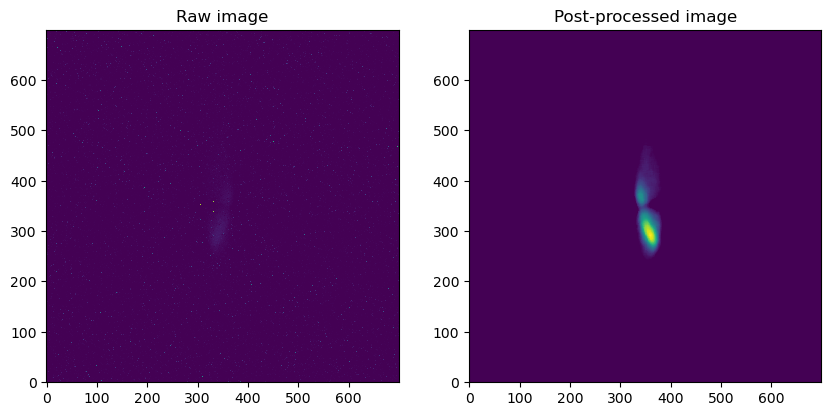

In [19]:
# plot it and compare with raw image:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(
    test_img.T,
    interpolation='none',
    origin='lower'
)
ax[0].set_title('Raw image')
ax[1].imshow(
    pp_test_img.T,
    interpolation='none',
    origin='lower'
)
ax[1].set_title('Post-processed image')

In [20]:
# write the two for loops to apply the post-processing to all images:
